In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/markrober1.png')
img.shape

(1501, 1501, 3)

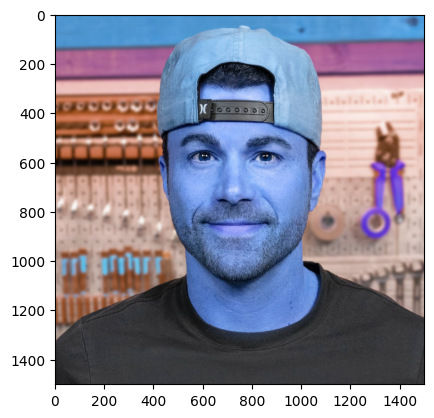

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1501, 1501)

In [5]:
gray

array([[156, 156, 156, ..., 177, 177, 177],
       [156, 156, 156, ..., 177, 177, 177],
       [156, 156, 156, ..., 177, 177, 177],
       ...,
       [ 36,  38,  30, ...,  55,  53,  50],
       [ 41,  34,  28, ...,  54,  55,  54],
       [ 45,  37,  28, ...,  54,  52,  53]], dtype=uint8)

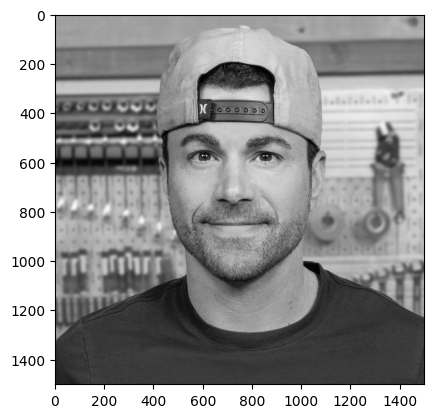

In [6]:
plt.imshow(gray,cmap='gray')

Faces detected: 2


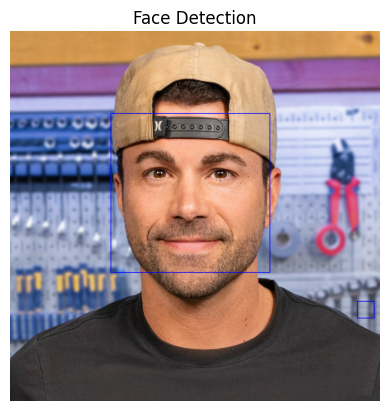

In [13]:
import cv2

face_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

from matplotlib import pyplot as plt

# Load classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load image
img = cv2.imread('./test_images/markrober1.png')
if img is None:
    raise IOError("Image not found")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 6)
print("Faces detected:", len(faces))

# Draw rectangle around each face
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Show result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Face Detection")
plt.axis('off')
plt.show()

Faces detected: 1


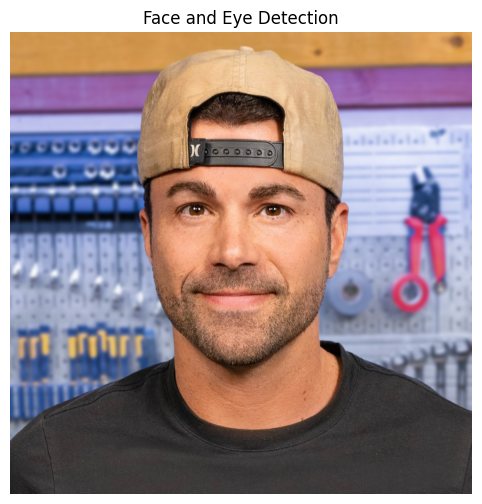

In [25]:
import cv2
from matplotlib import pyplot as plt

# Load cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load image
img = cv2.imread('./test_images/markrober1.png')
if img is None:
    raise IOError("Image not found")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 7)
print("Faces detected:", len(faces))

# Show image with rectangles on faces and eyes
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Face and Eye Detection")
plt.axis('off')
plt.show()


Face 1 coords: x=409, y=334, w=645, h=645
Eyes detected in face 1: 2
Cropped face 1 shape: (645, 645, 3)


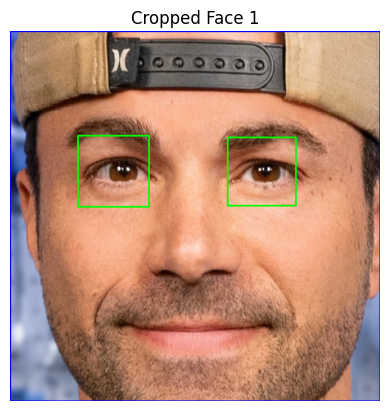

In [28]:
# Draw and crop each face
for i, (x, y, w, h) in enumerate(faces):
    # Convert to int (just in case)
    x, y, w, h = map(int, (x, y, w, h))

    print(f"Face {i+1} coords: x={x}, y={y}, w={w}, h={h}")

    # Draw face rectangle on original image
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Detect eyes in upper half of face
    roi_gray = gray[y:y + h // 2, x:x + w]
    roi_color = img[y:y + h // 2, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=7)
    print(f"Eyes detected in face {i+1}: {len(eyes)}")

    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

    # Crop full face region from original image
    cropped_face = img[y:y + h, x:x + w]
    print(f"Cropped face {i+1} shape:", cropped_face.shape)

    # Show cropped face
    plt.figure()
    plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))
    plt.title(f"Cropped Face {i+1}")
    plt.axis('off')

In [29]:
import cv2
import numpy as np

def get_cropped_image_if_2_eyes(image_path):
    # Load cascades
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        raise IOError("Image not found")
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 6)
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h // 2, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)
        
        # If exactly 2 eyes detected, crop and return the face
        if len(eyes) == 2:
            cropped_face = img[y:y + h, x:x + w]
            return cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)
    
    # If no face with 2 eyes found, return None or raise error
    return None

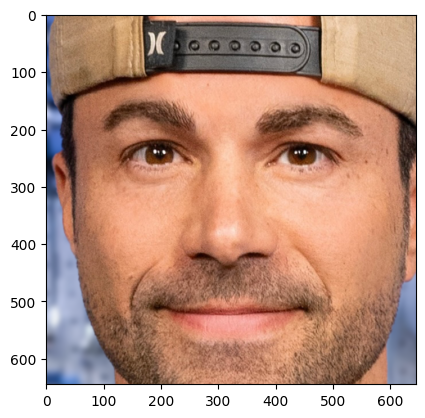

In [30]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/markrober1.png')
plt.imshow(cropped_image)

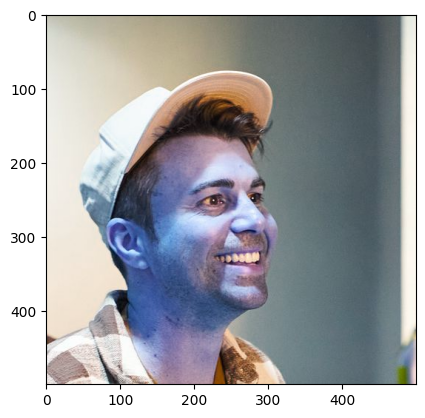

In [33]:
org_image_obstructured = cv2.imread('./test_images/markrober2.jpg')
plt.imshow(org_image_obstructured)

In [38]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/markrober2.jpg')
cropped_image_no_2_eyes